In [5]:
import xarray as xr
import netCDF4 as nc 
import numpy as np

from  wtc_pbl import *
from plot_as_sce import *


In [6]:
filename = '/home/medico_eafit/WORKSPACES/sebastian_carmona/data/EAFIT/Dataset1/LiMon_Raw_Data_cc/2022/04/13/RS/LPP_OUT/RS_L0_L1_L2.nc'
ncfile = nc.Dataset(filename)
group = ncfile.groups['L2_Data']
dataset = xr.open_dataset(xr.backends.NetCDF4DataStore(group))
global_attributes = {attr: ncfile.getncattr(attr) for attr in ncfile.ncattrs()}

start_time = dataset.Start_Time_AVG_L2.values.astype('float32') // 10**9
stop_time = dataset.Stop_Time_AVG_L2.values

avg_time = (start_time + stop_time) / 2

datetime_ns = np.array(avg_time, dtype='datetime64[s]')
datetime_ns = datetime_ns.astype('datetime64[ns]') 

dataset = dataset.assign_coords(time=datetime_ns)

dataset = dataset.sel(channels=0, range=slice(100, 5000))

dataset

<xarray.Dataset> Size: 70MB
Dimensions:                          (time: 605, lrs: 5, range: 1306)
Coordinates:
  * range                            (range) float64 10kB 103.1 ... 4.997e+03
  * time                             (time) datetime64[ns] 5kB 2022-04-13T15:...
Dimensions without coordinates: lrs
Data variables:
    Aerosol_Extinction               (time, lrs, range) float64 32MB ...
    Aerosol_Backscattering           (time, lrs, range) float64 32MB ...
    Range_Corrected_Lidar_Signal_L2  (time, range) float64 6MB ...
    Start_Time_AVG_L2                (time) datetime64[ns] 5kB 2022-04-13T15:...
    Stop_Time_AVG_L2                 (time) int32 2kB 1649865288 ... 1649885480
    Zenith_AVG_L2                    (time) float64 5kB ...
    Azimuth_AVG_L2                   (time) float64 5kB ...
    MaxRangeAnalysis                 (time) float64 5kB ...
    LRs                              (lrs) float64 40B ...
    AOD_LR                           (time, lrs) float64 24kB ...
    Ref_Range_ASL_m                  (time) float64 5kB ...
    Fernald_smooth_bins              int32 4B ...
Attributes:
    indxChannel_for_Fernald_inv:  0
    Wavelength_Inverted:          532
    Averaged_Profiles_L2:         1
    R_Ref:                        1.0

Proccesing profiles...: 0it [00:00, ?it/s]

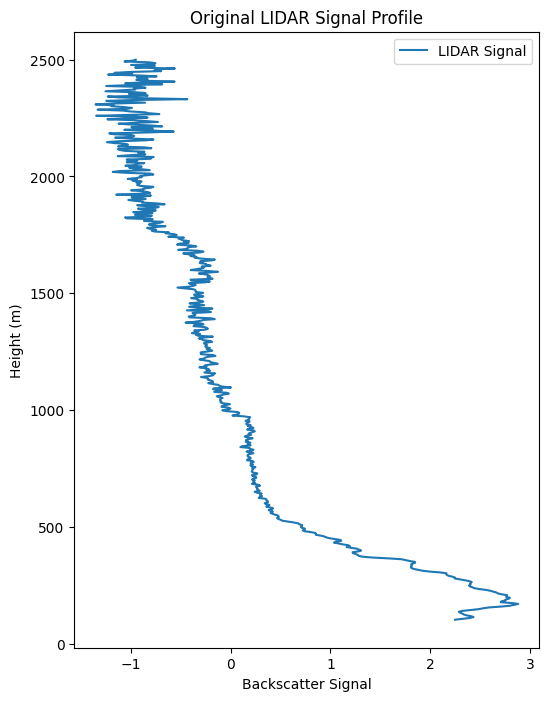

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 40.31it/s]


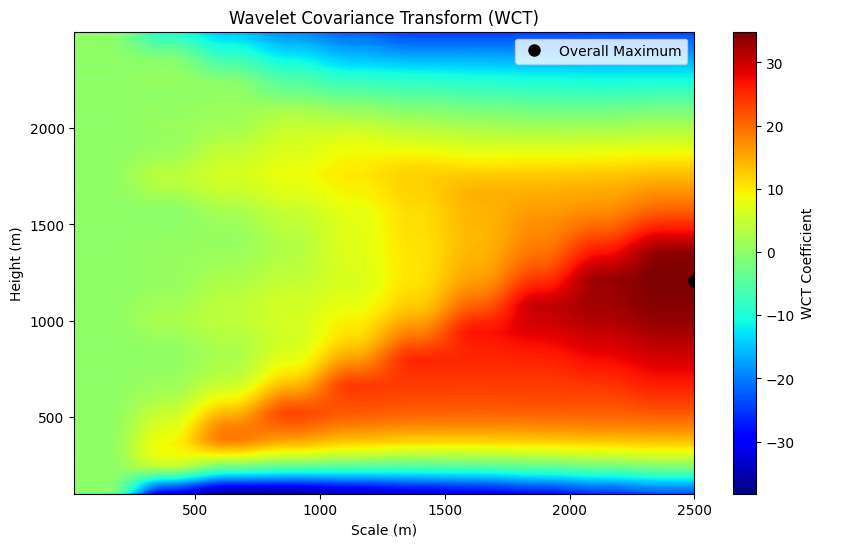

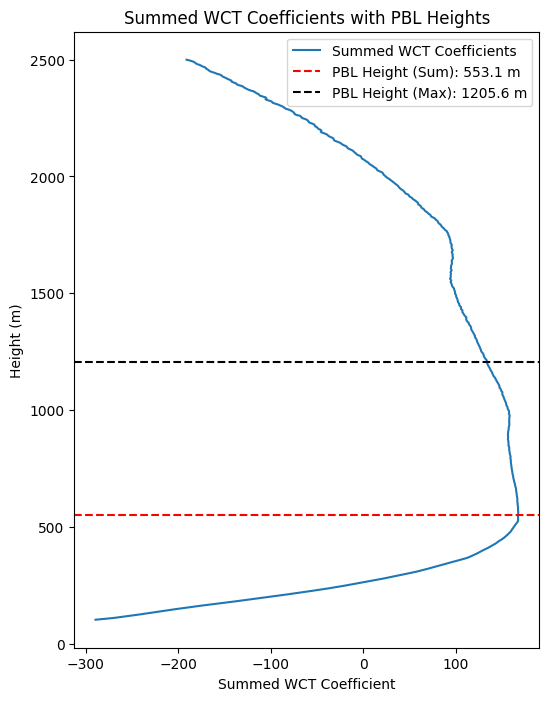

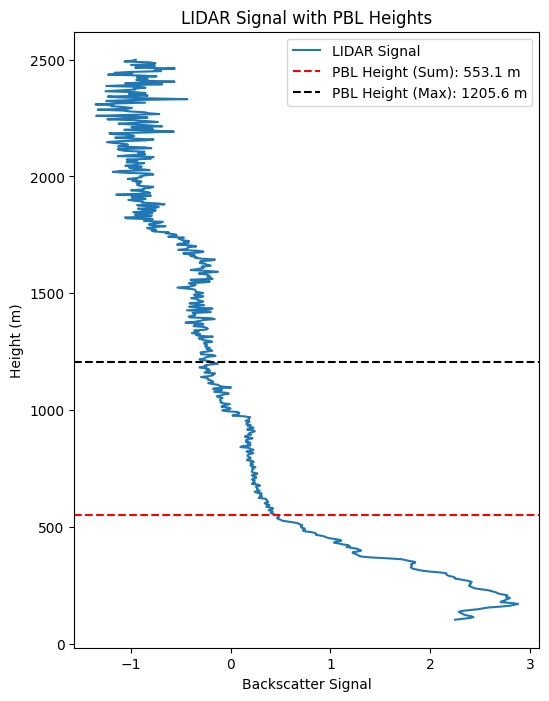

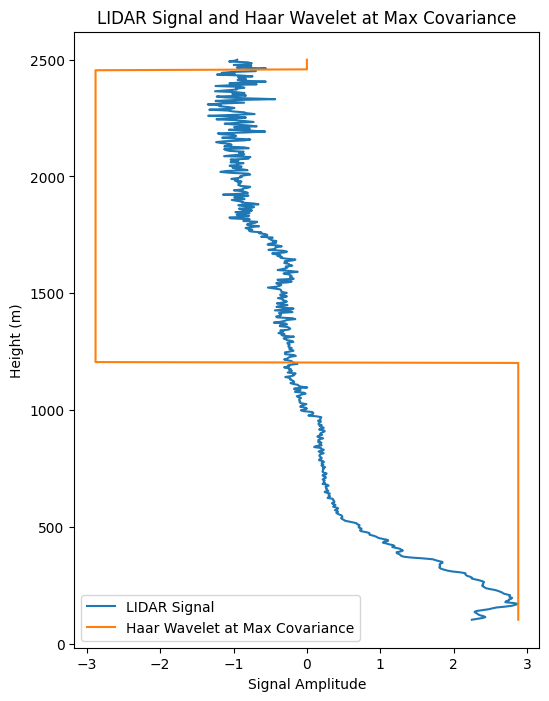

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 43.92it/s]
Proccesing profiles...: 100it [00:25,  4.14it/s]

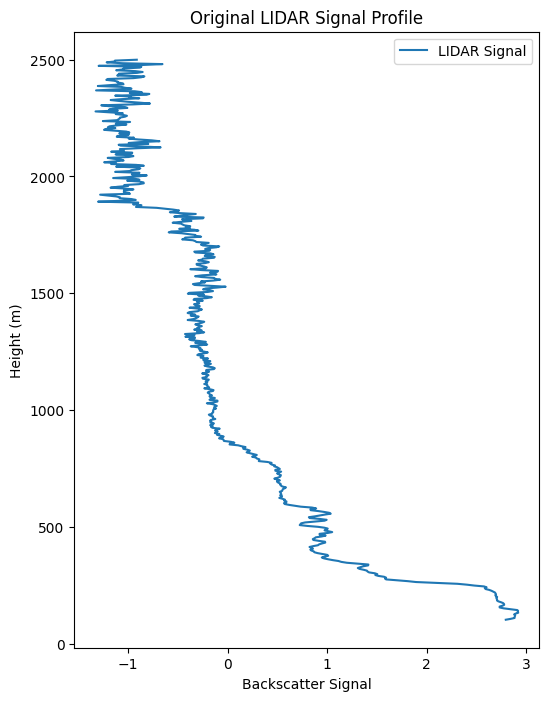

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 43.73it/s]


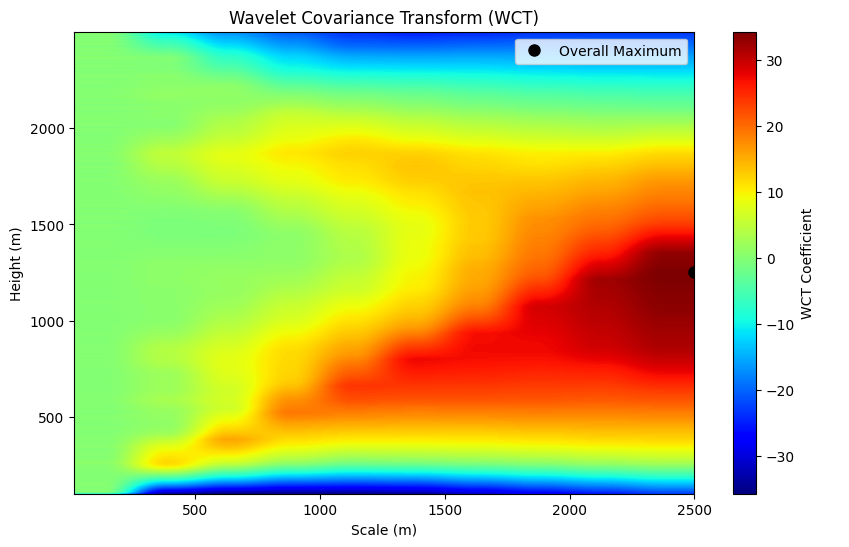

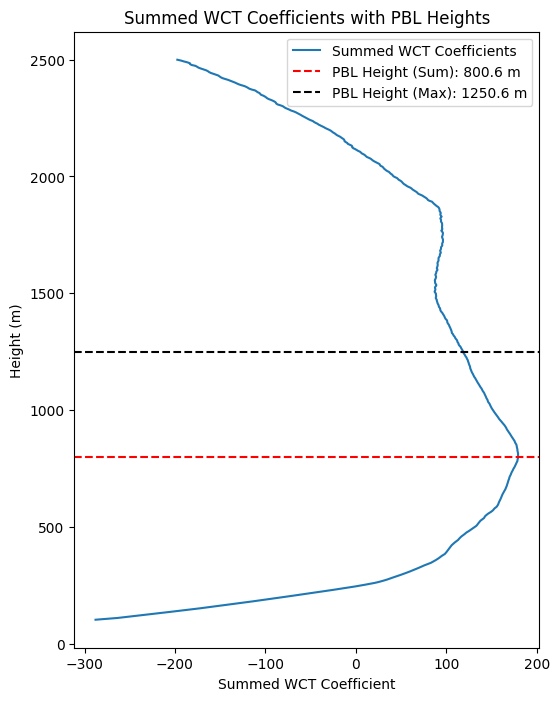

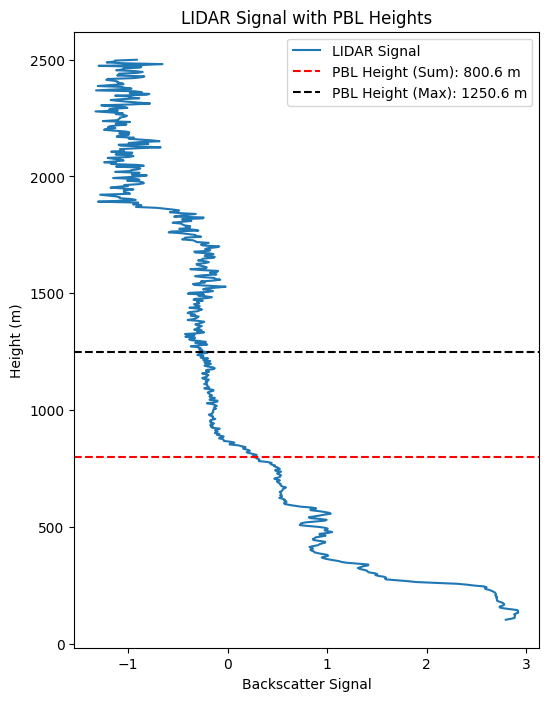

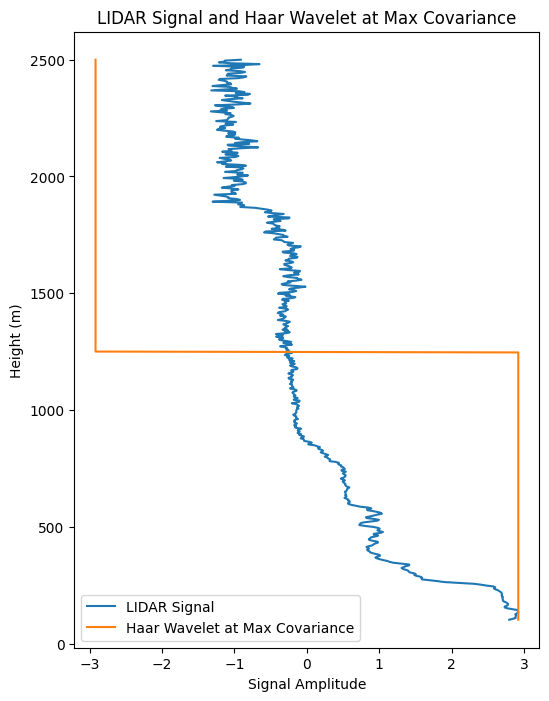

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 43.41it/s]
Proccesing profiles...: 200it [00:50,  4.16it/s]

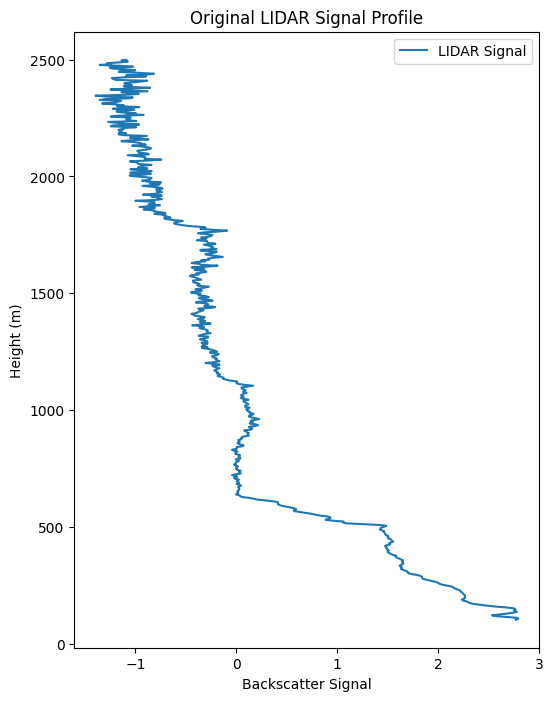

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 43.51it/s]


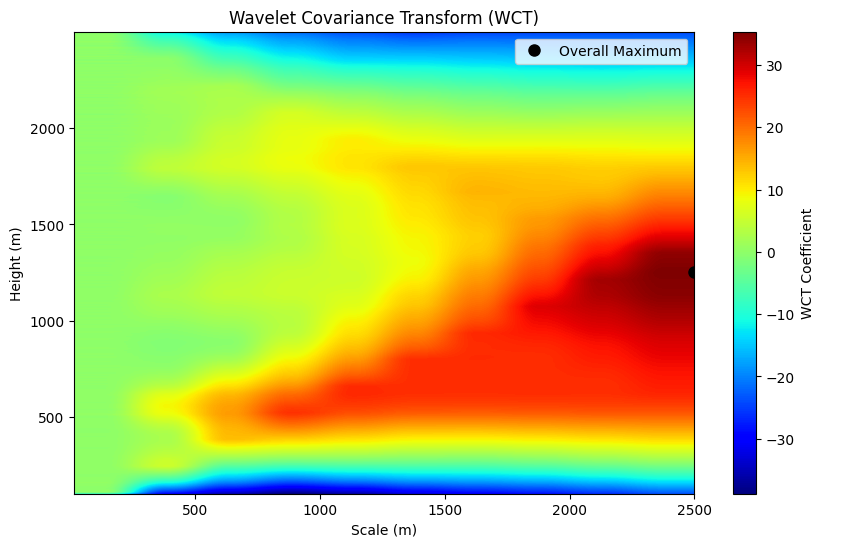

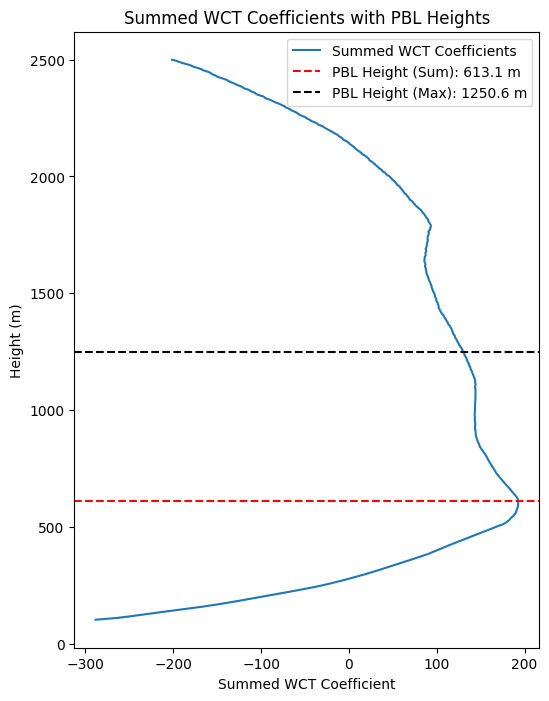

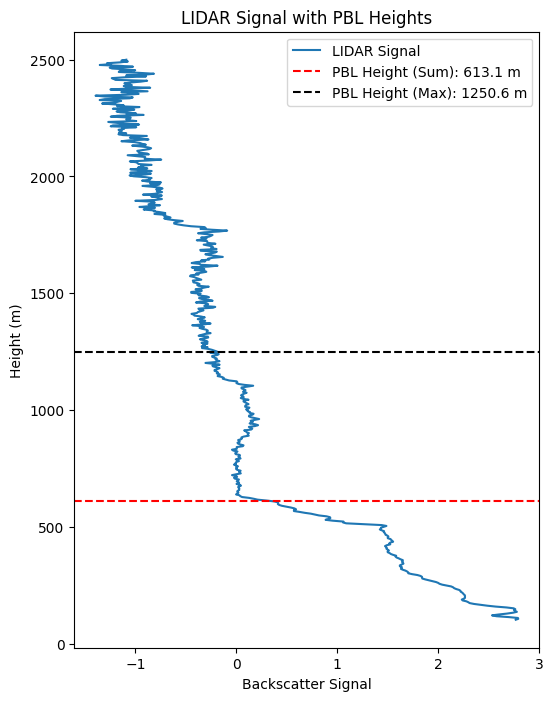

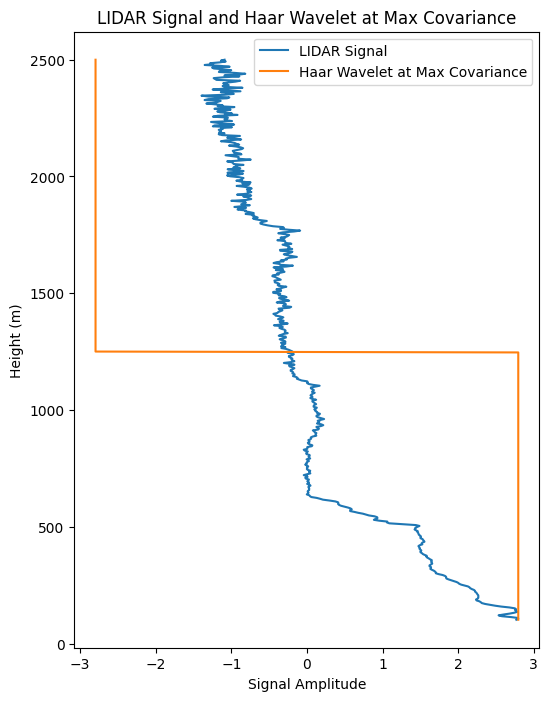

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 42.52it/s]
Proccesing profiles...: 300it [01:14,  4.18it/s]

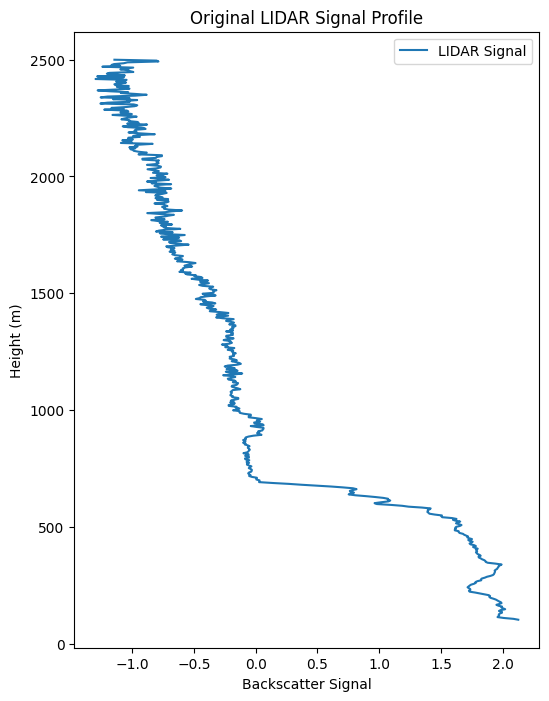

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 39.64it/s]


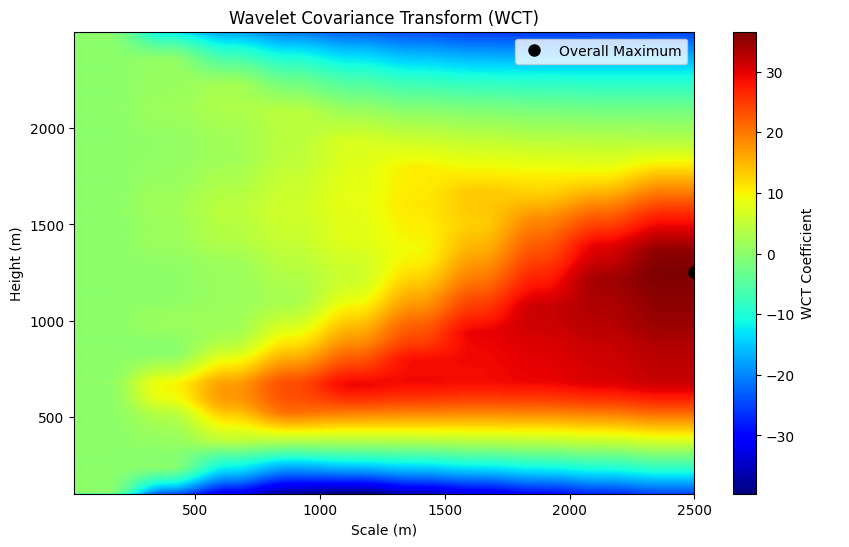

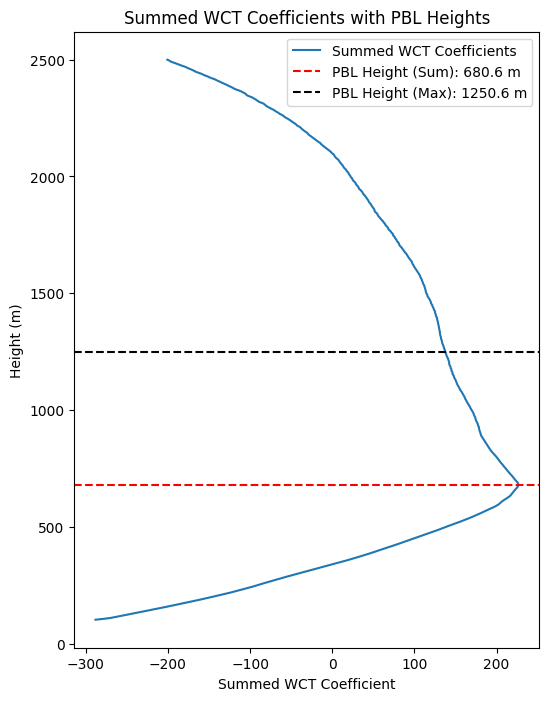

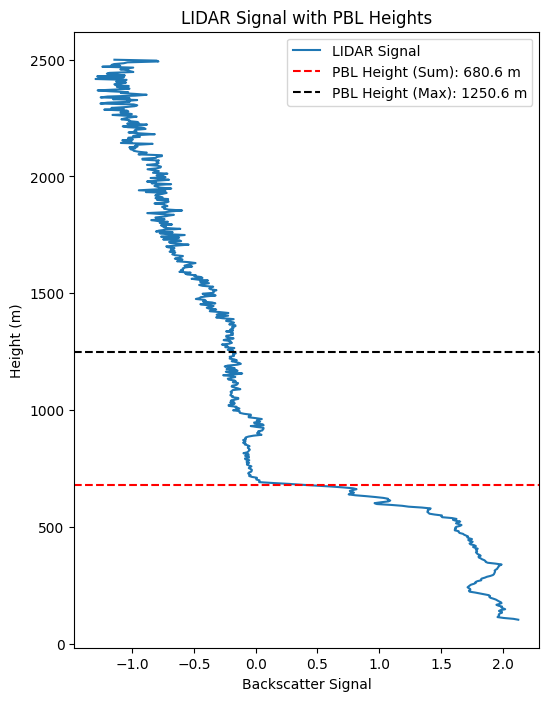

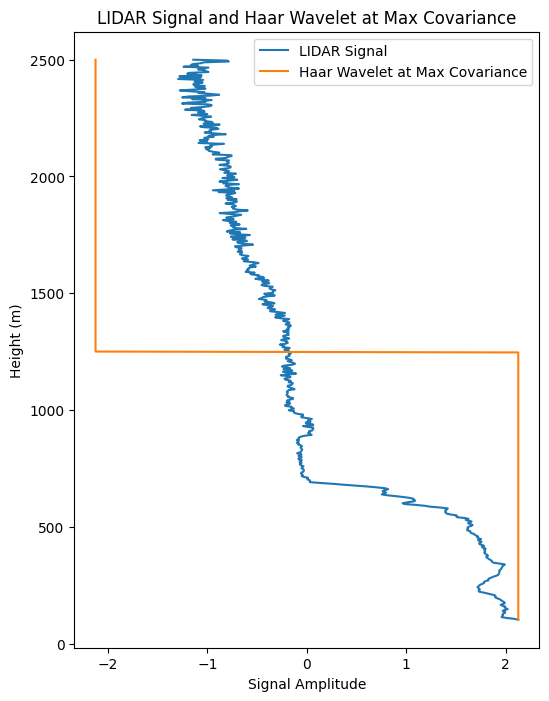

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 42.60it/s]
Proccesing profiles...: 400it [01:40,  4.01it/s]

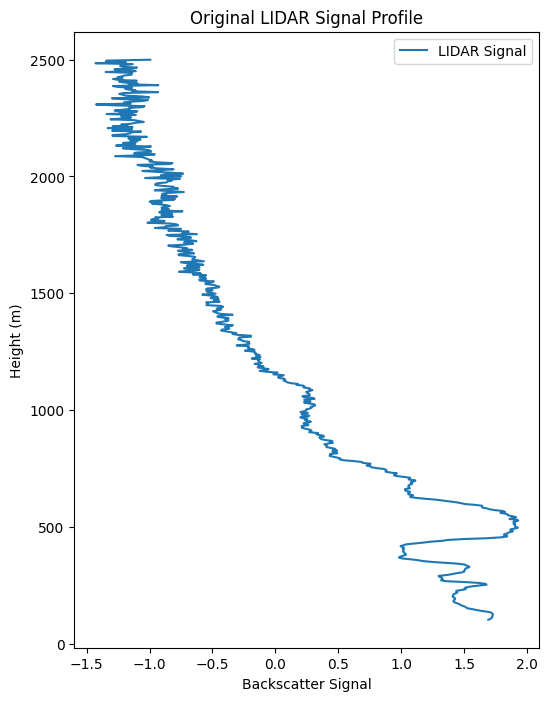

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 41.67it/s]


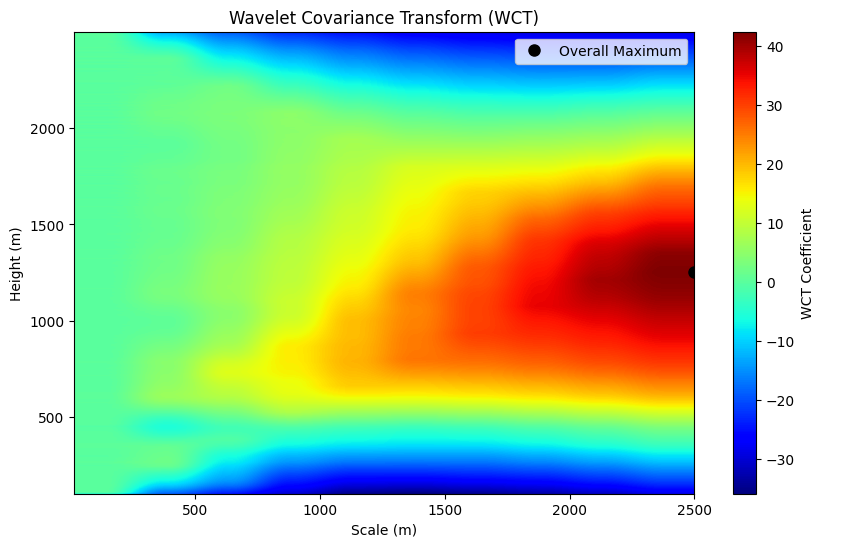

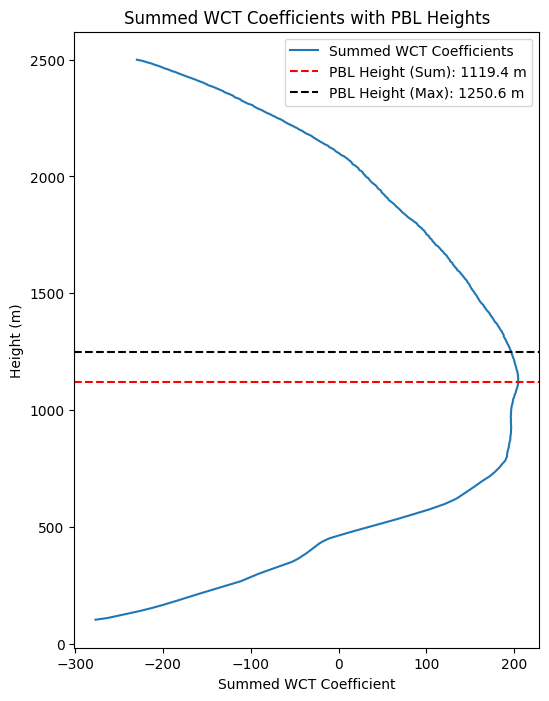

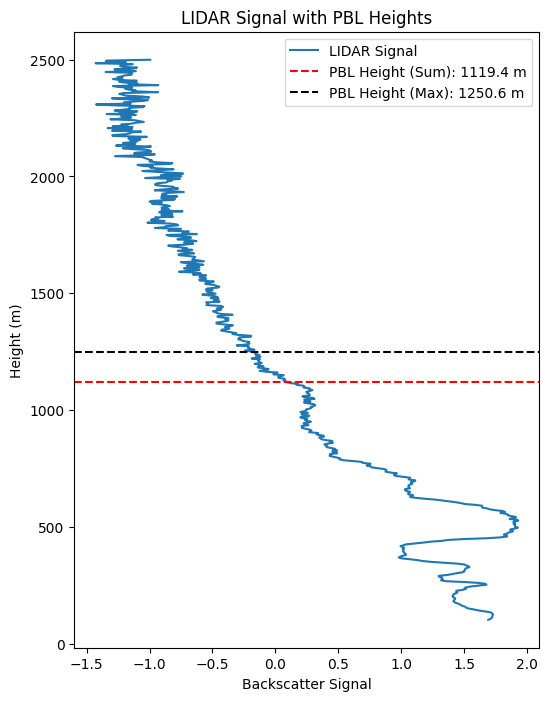

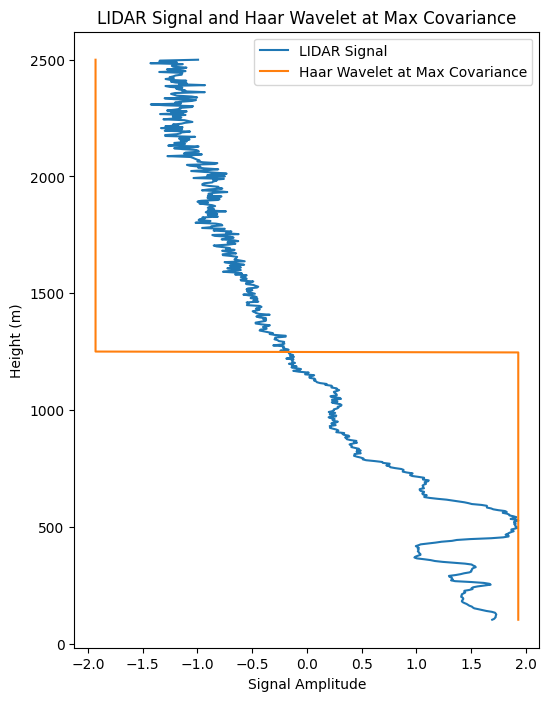

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 42.92it/s]
Proccesing profiles...: 500it [02:05,  4.07it/s]

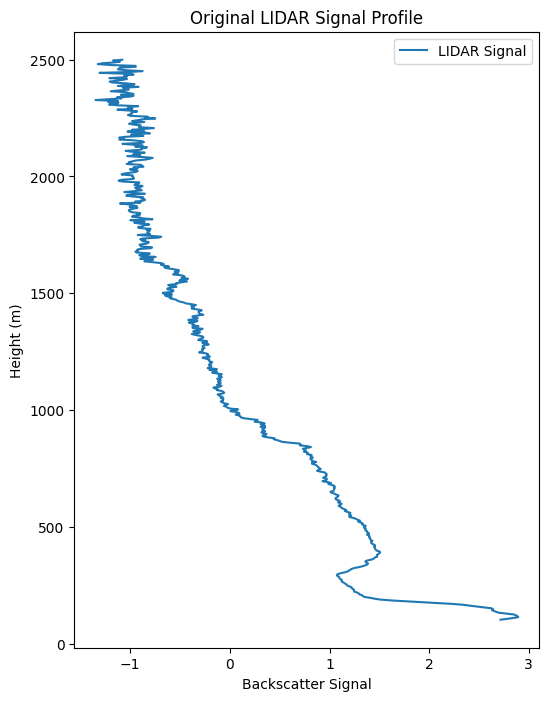

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 40.88it/s]


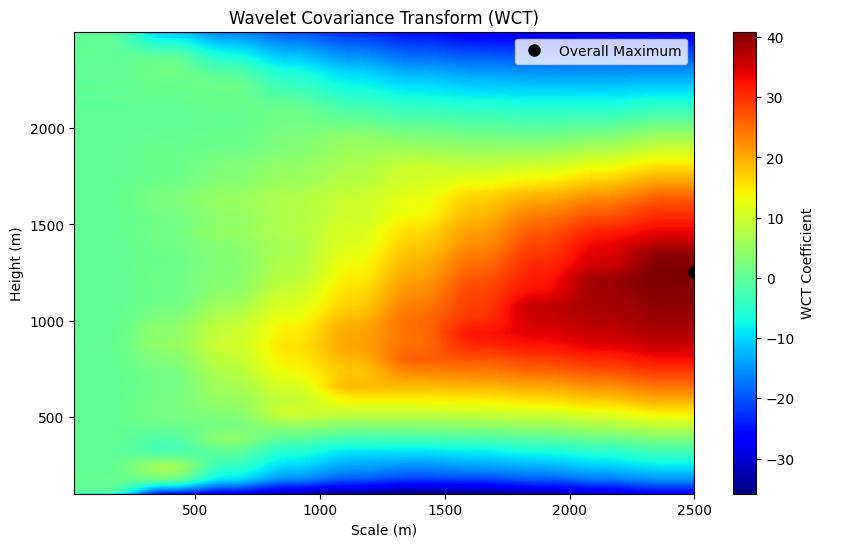

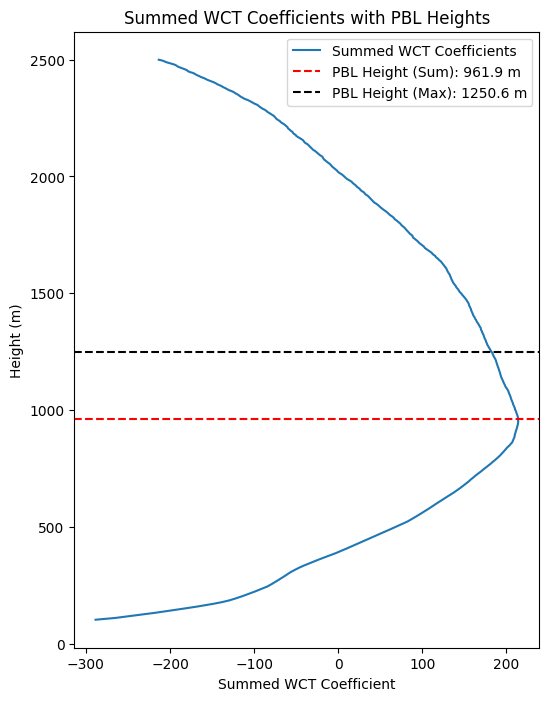

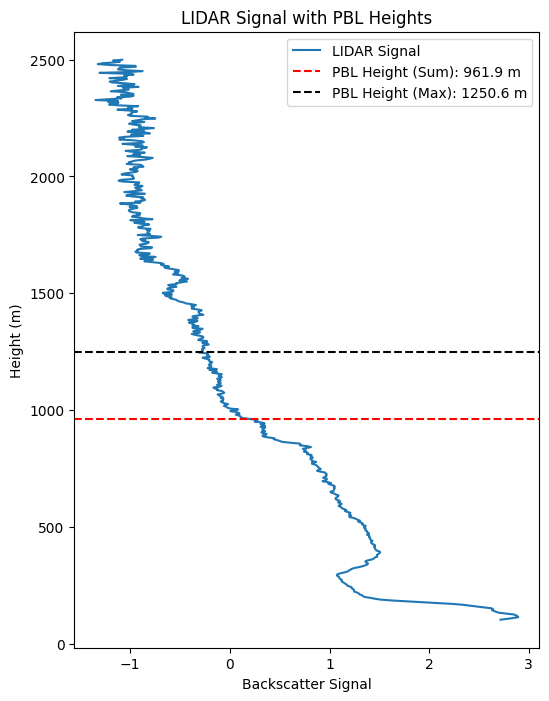

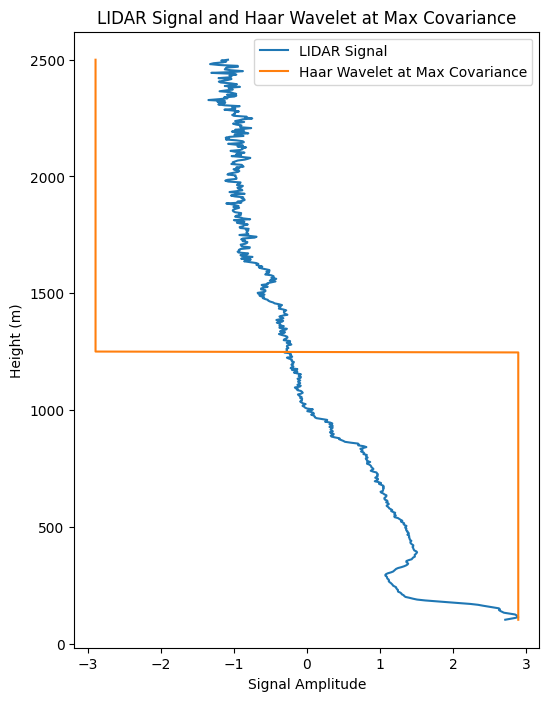

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 42.35it/s]
Proccesing profiles...: 600it [02:31,  4.13it/s]

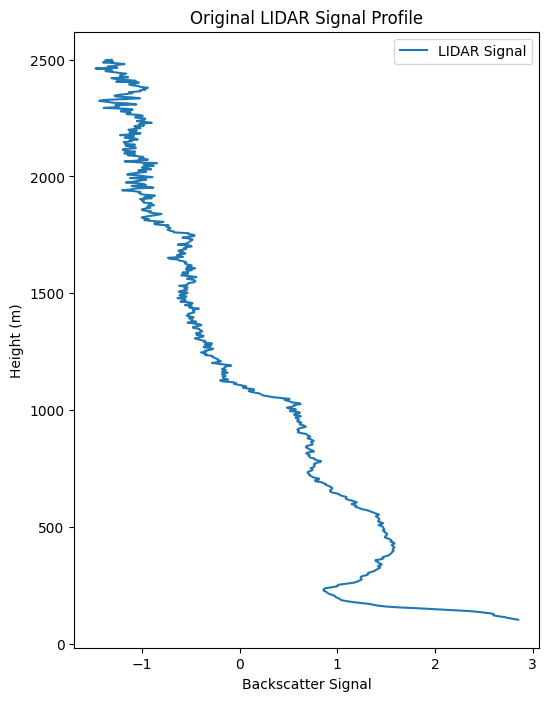

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 41.69it/s]


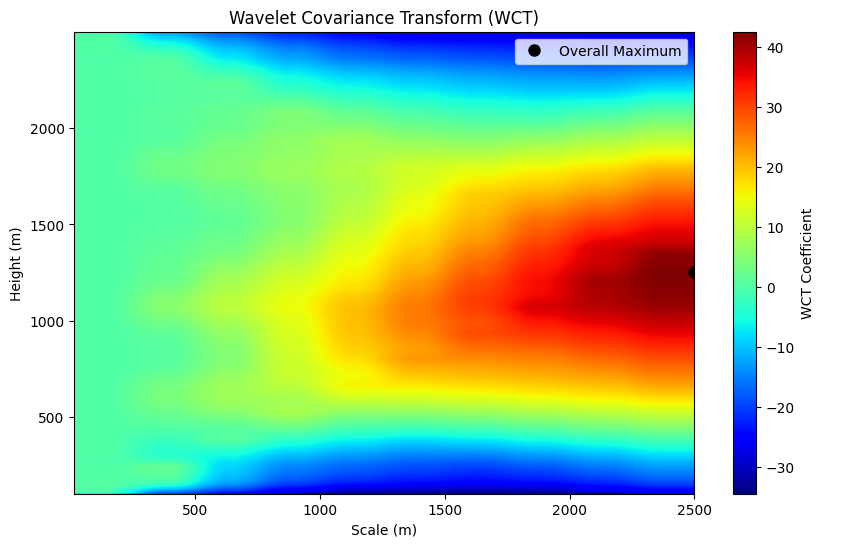

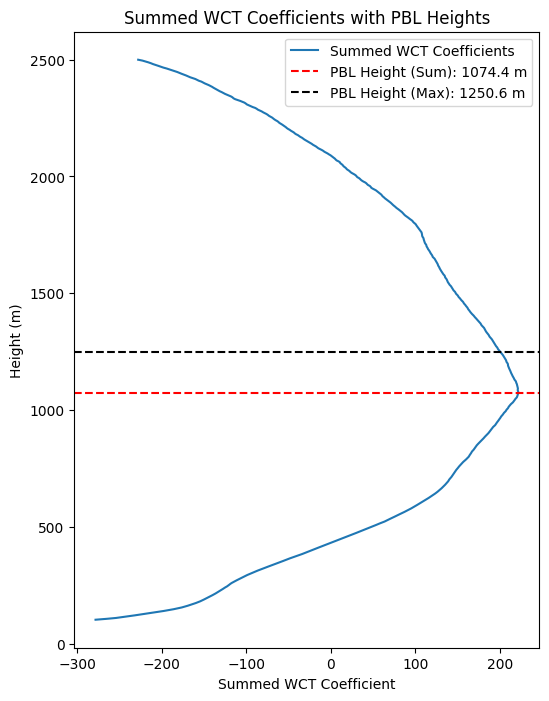

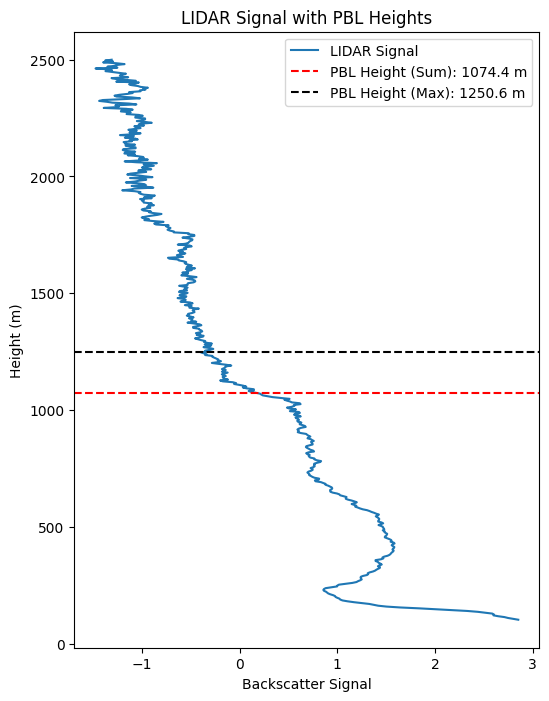

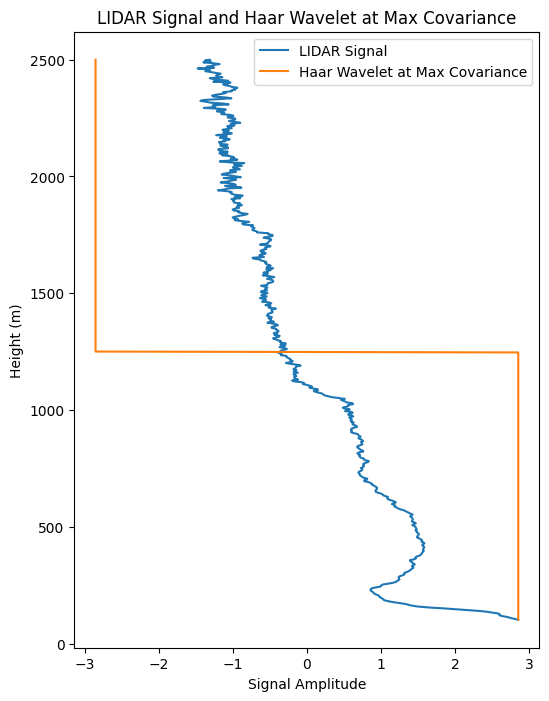

Iterating over dilatations...: 100%|██████████| 10/10 [00:00<00:00, 40.59it/s]
Proccesing profiles...: 605it [02:33,  3.95it/s]


In [7]:
signal_variable = 'Range_Corrected_Lidar_Signal_L2'  # Replace with your signal variable name
range_variable = 'range'  # Replace with your range variable name
time_variable = 'time'  # Replace with your time variable name

# Define scales to use (in meters)
delta_r = dataset[range_variable].values[1] - dataset[range_variable].values[0]
scales = np.linspace(4 * delta_r, 2500, 10)  # Adjust scales as needed

# pdb.set_trace()    

# Process the dataset
pbl_heights = process_lidar_dataset(
    dataset.sel(range=slice(100, 2500)),
    signal_variable,
    range_variable,
    time_variable,
    scales
)


In [12]:
pbl_heights

<xarray.Dataset> Size: 15kB
Dimensions:         (time: 605)
Coordinates:
  * time            (time) datetime64[ns] 5kB 2022-04-13T15:54:54 ... 2022-04...
Data variables:
    pbl_height_sum  (time) float64 5kB 553.1 568.1 609.4 ... 1.067e+03 1.056e+03
    pbl_height_max  (time) float64 5kB 1.206e+03 1.172e+03 ... 1.251e+03

In [13]:
# Save the PBL heights to a new NetCDF file
pbl_heights.to_netcdf('/home/medico_eafit/WORKSPACES/sebastian_carmona/dev/WTC_PBL_METHOD/outputs/pbl_heights_wtc.nc')
pbl_heights

<xarray.Dataset> Size: 15kB
Dimensions:         (time: 605)
Coordinates:
  * time            (time) datetime64[ns] 5kB 2022-04-13T15:54:54 ... 2022-04...
Data variables:
    pbl_height_sum  (time) float64 5kB 553.1 568.1 609.4 ... 1.067e+03 1.056e+03
    pbl_height_max  (time) float64 5kB 1.206e+03 1.172e+03 ... 1.251e+03

In [14]:
ds = dataset

<class 'numpy.ndarray'>


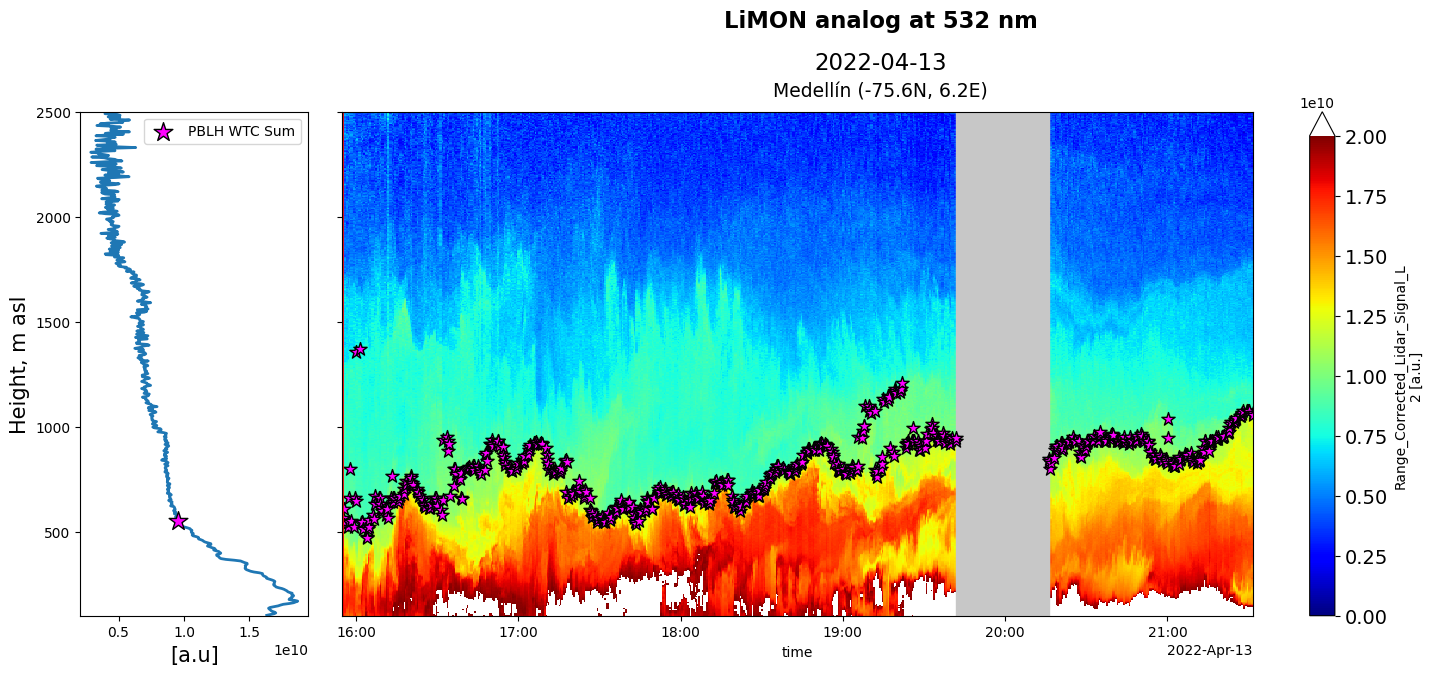

<class 'numpy.ndarray'>


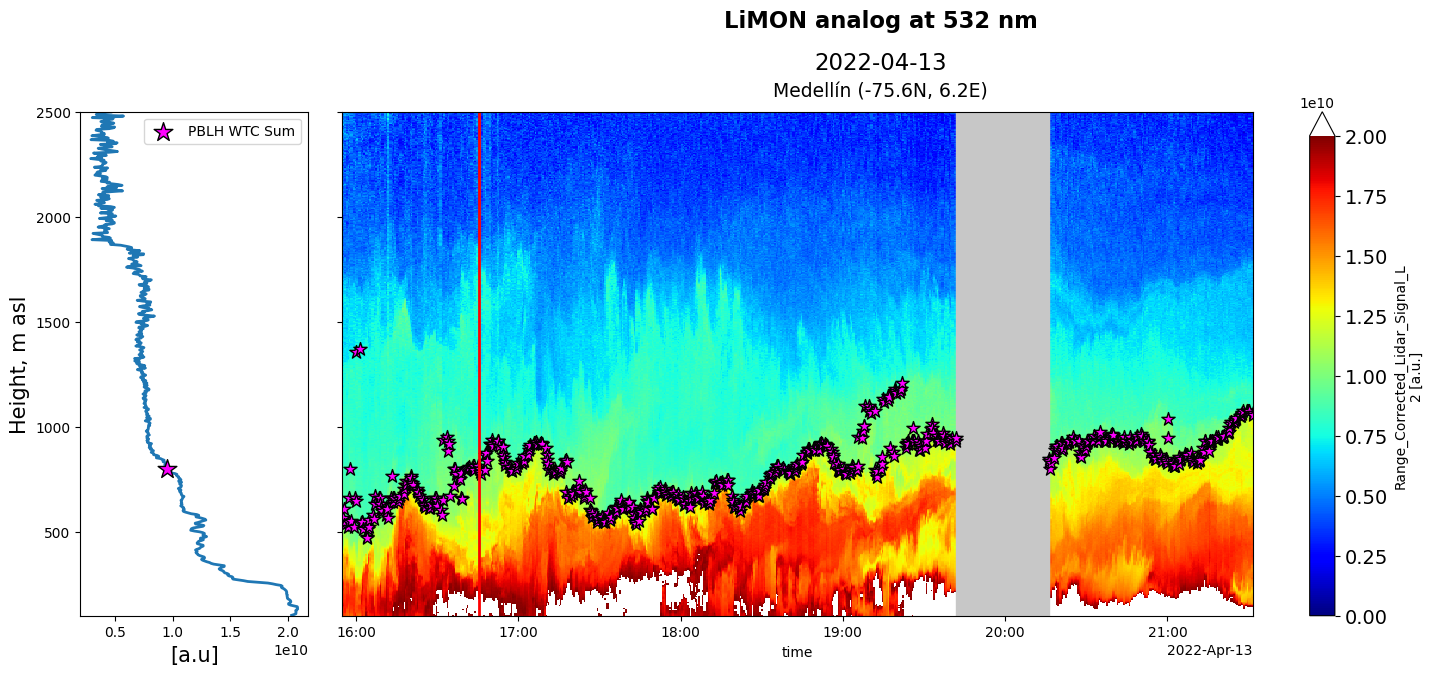

<class 'numpy.ndarray'>


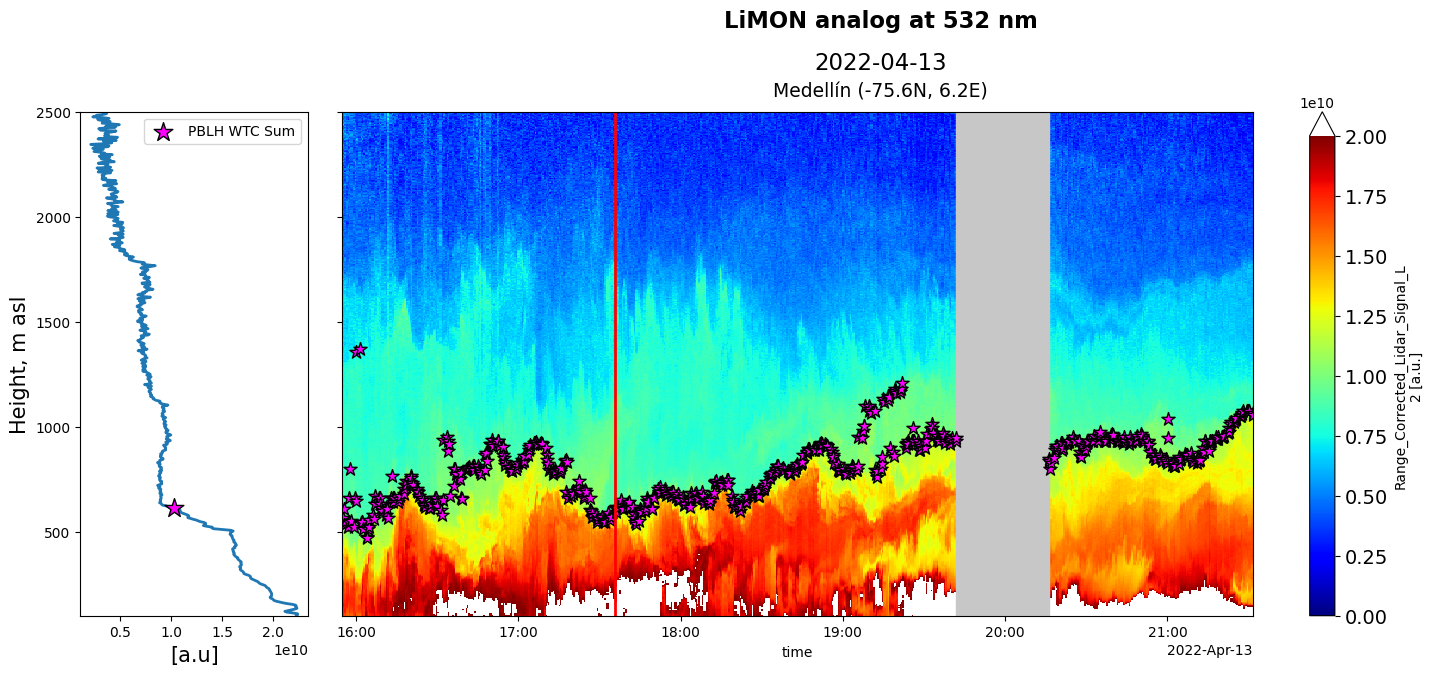

<class 'numpy.ndarray'>


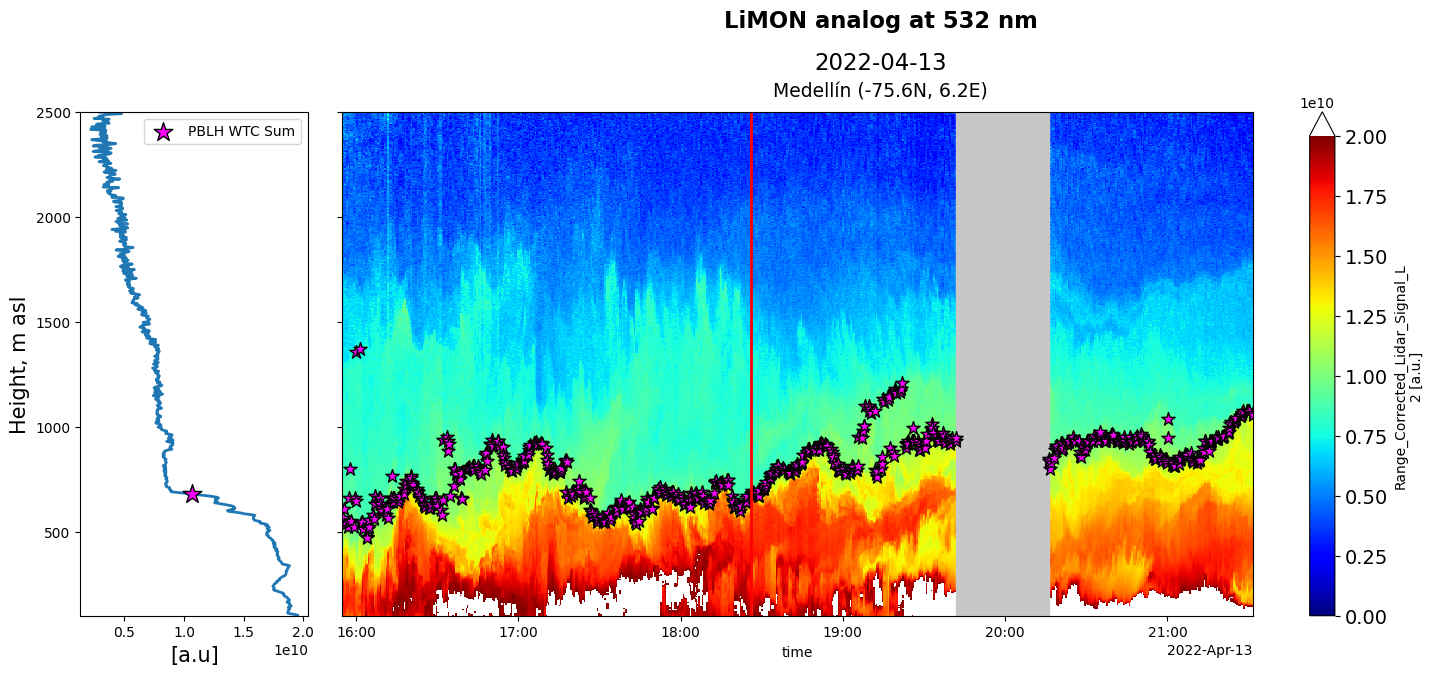

<class 'numpy.ndarray'>


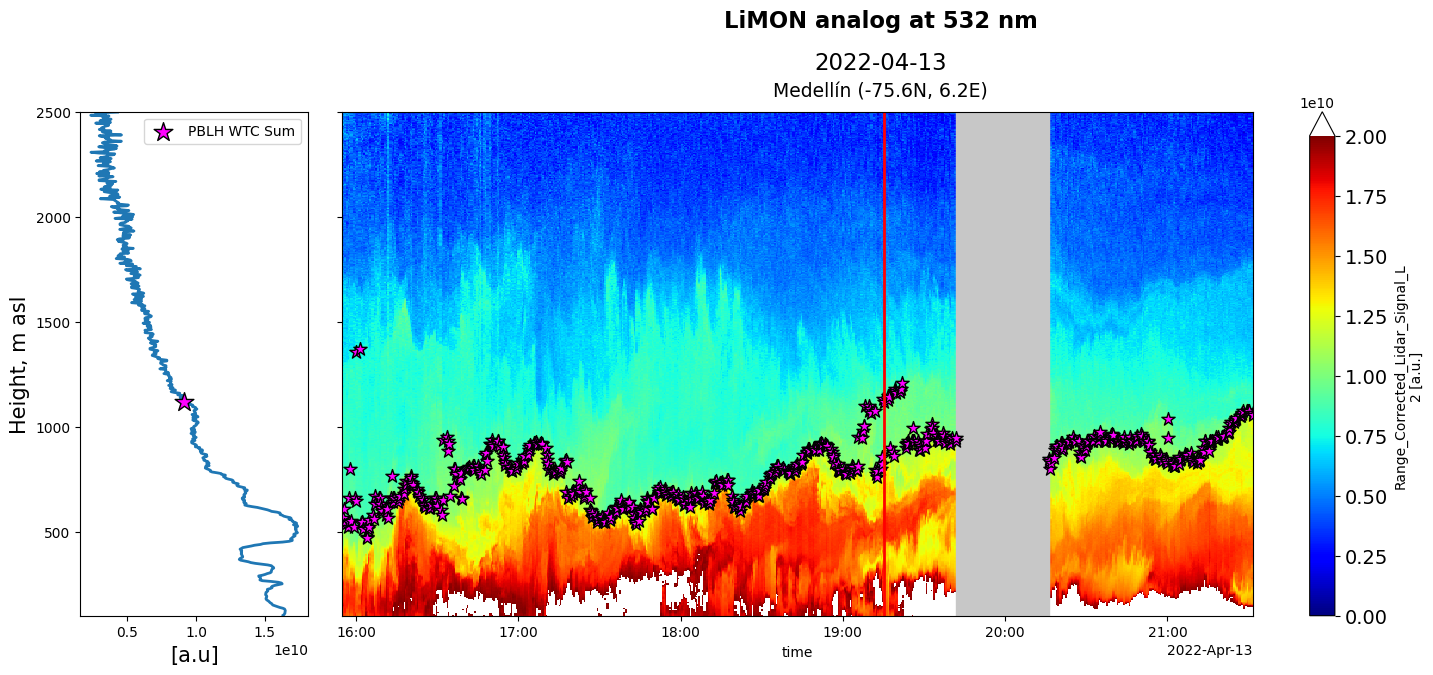

<class 'numpy.ndarray'>


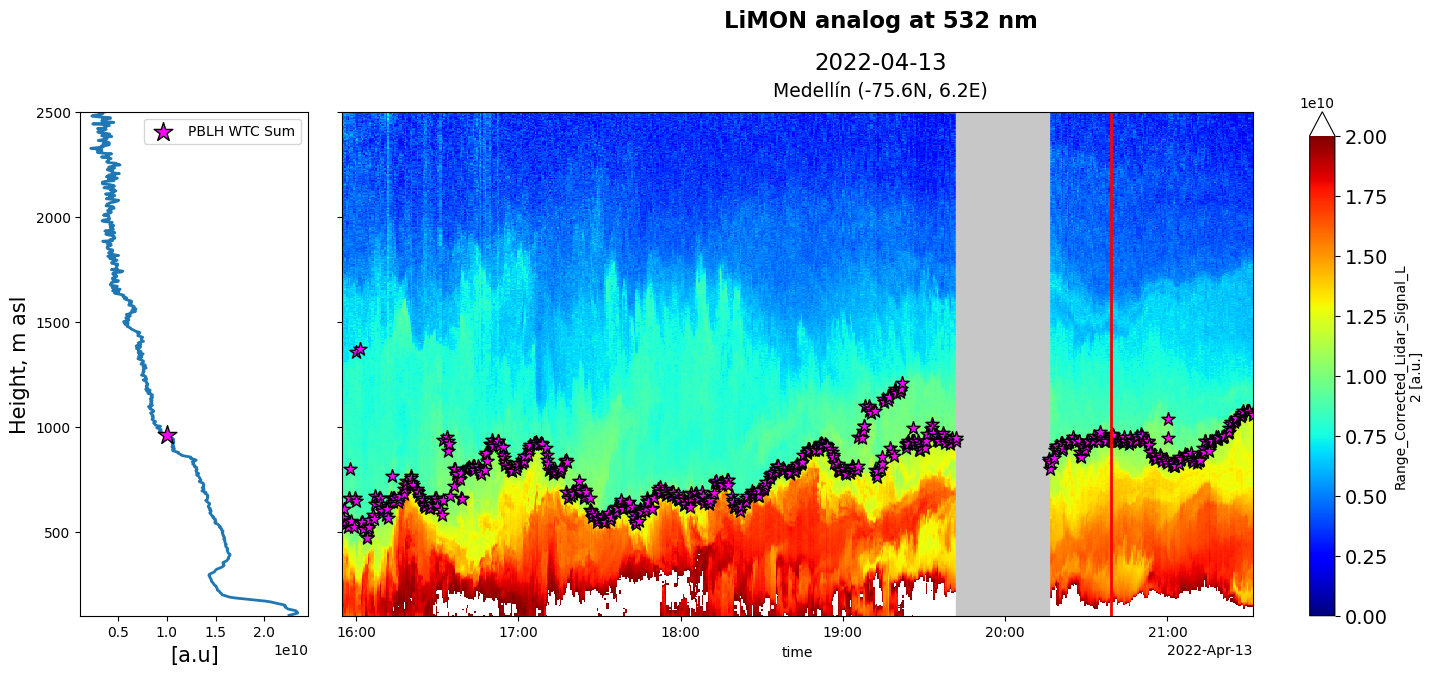

<class 'numpy.ndarray'>


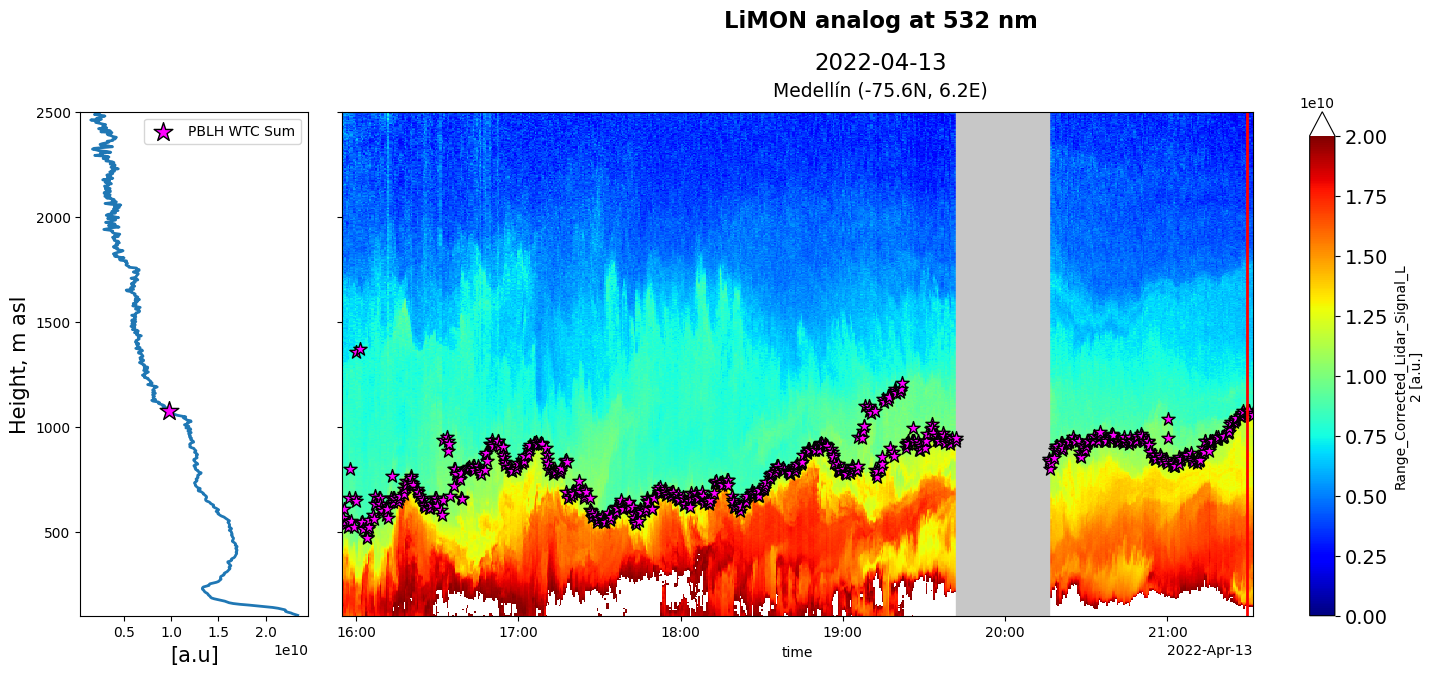

In [28]:
# Asignar las PBLH al dataset
ds['pblh_wtc_sum'] = pbl_heights.pbl_height_sum
ds['pblh_wtc_max'] = pbl_heights.pbl_height_max

max_range = 2500
for time in ds.time.values[::100]:
    # Definir subplots con proporción 1:4 entre ax1 y ax2
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 7], sharey=True, gridspec_kw={'width_ratios': [1, 5]})

    # Obtener el perfil LIDAR para el tiempo actual
    lidar_profile = ds.Range_Corrected_Lidar_Signal_L2.sel(time=time, range=slice(0, max_range))
    range_values = ds.sel(range=slice(0, max_range)).range

    # Plot en ax1 con zorder menor
    ax1.plot(lidar_profile, range_values, linewidth=2, zorder=2)

    # Obtener los valores de PBLH para el tiempo actual
    pblh_sum = ds.pblh_wtc_sum.sel(time=time).values
    pblh_max = ds.pblh_wtc_max.sel(time=time).values

    # Graficar las estrellas en ax1 con zorder mayor
    # Para pblh_wtc_sum
    ax1.scatter(
        lidar_profile.sel(range=pblh_sum, method="nearest"),
        pblh_sum,
        marker="*",
        c="magenta",
        edgecolors="black",
        s=200,
        zorder=3,
        label='PBLH WTC Sum'
    )

    # Para pblh_wtc_max
    # ax1.scatter(
    #     lidar_profile.sel(range=pblh_max, method="nearest"),
    #     pblh_max,
    #     marker="*",
    #     c="yellow",
    #     edgecolors="black",
    #     s=200,
    #     zorder=3,
    #     label='PBLH WTC Max'
    # )

    ax1.legend()

    ax1.set_ylabel('Height, m asl', fontsize=15)
    ax1.set_xlabel('[a.u]', fontsize=15)

    # Plot en ax2
    plot_as_me(
        ds=ds.sel(range=slice(0, max_range)),
        channel='Range_Corrected_Lidar_Signal_L2',
        axes=ax2,
        qt="Limon",
        wl="532",
        signal_mode="analog",
        attrs=global_attributes,
        vmin=0,
        vmax=2e10,
        fixed_time_range=False
    )

    ds.pblh_wtc_sum.plot.scatter(
        ax=ax2,
        s=100,
        marker="*",
        color="magenta",
        edgecolors="black",
        label="WTC Sum"
    )
    # ds.pblh_wtc_max.plot.scatter(
    #     ax=ax2,
    #     s=100,
    #     marker="*",
    #     color="yellow",
    #     edgecolors="black",
    #     label="WTC Max"
    # )
    # ax2.legend(loc='upper right')

    # Crear rectángulo para resaltar el tiempo actual en ax2
    endTime = time + np.timedelta64(1, 's')
    start = mpl.dates.date2num(time)
    end = mpl.dates.date2num(endTime)
    width = end - start
    rect = mpl.patches.Rectangle(
        (start, 0),
        width,
        max_range,
        linewidth=2,
        color='red',
        fill=False
    )
    ax2.add_patch(rect)

    # Eliminar etiquetas de ticks del eje y en ax2
    ax2.tick_params(labelleft=False)
    ax2.set_ylabel('')  # Eliminar label del eje y en ax2

    plt.subplots_adjust(
        left=0.1,
        bottom=0.1,
        right=0.8,
        top=0.82,
        wspace=0.05,
        hspace=0.4
    )

    plt.show()
